# Visualization - Sephora Website

#### Introduction

Saya adalah seorang data scientist di sebuah e-comerce yang fokus dalam penjualan alat kosmetik, yaitu sephora.
pada suatu hari CEO datang untuk menenyakan beberapa hal dibawah, kita dapat menjawabnya menggunakan visualisasi data sehingga mudah dipahami oleh seorang CEO.

#### Task

- [x] Untuk kategori "Perfume", "Moisturizers" bagaimana distribusi untuk harganya ? apakah mahal atau murah ?
- [x] Untuk brand "SEPHORA COLLECTION" apakah banyak yang suka dengan produknya ? (jangan gunakan review 0)
- [x] Bandingkan harga antara brand "Dior" dengan "SEPHORA COLLECTION" ?
- [x] Siapa brand yang paling banyak memiliki jumlah barang ? urutkan top 5 ?
- [x] Siapa brand yang paling banyak disukai ? urutkan top 5 ?
- [x] Kategori apa yang paling banyak menyumbang penjualan dari brand "tarte" ?
- [x] Apakah ada hubungan antara harga dengan banyaknya produk yang terjual, dan banyaknya produk yang disukai ?

Untuk pengerjaan bisa melakukan modifikasi terhadap dataset terlebih dahulu, kemudian dilakukan visualisasi

#### Data Source

Dataset can be downloaded here:
https://www.kaggle.com/raghadalharbi/all-products-available-on-sephora-website/version/1

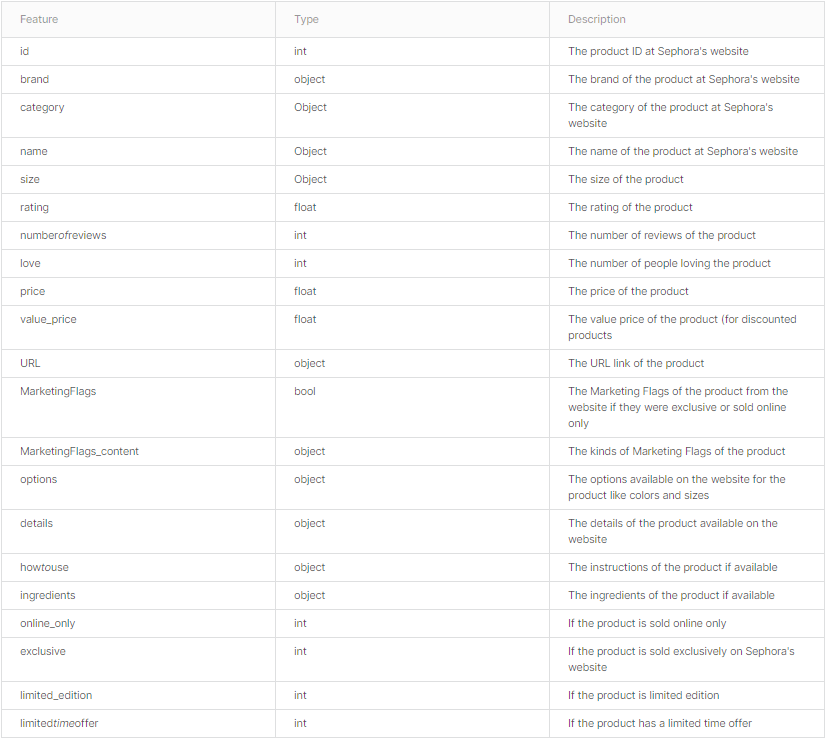

## Import Libraries

In [1]:
# Import default libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas 
import plotly.express as px

# Data Description Function
def desc(df):
    dataDesc = []

    for i in df.columns:
        dataDesc.append([
            i,
            df[i].dtypes,
            df[i].isna().sum(),
            round((((df[i].isna().sum()) / len(df)) * 100), 2),
            df[i].nunique(),
            df[i].drop_duplicates().sample(2).values
        ])

    description = pd.DataFrame(dataDesc, columns=[
        'Data Feature',
        'Data Types',
        'Null',
        'Null Percentage',
        'Unique',
        'Unique Sample'
    ])

    return description

C:\Users\Damianus Deni\AppData\Roaming\Python\Python37\site-packages\ipykernel\parentpoller.py:113: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


## Import Data

In [2]:
df = pd.read_csv('data/sephora_website_dataset.csv', index_col=0) # index_col='id' or index_col=0
df.head(2)

brand   category                            name  \
id                                                                   
2218774  Acqua Di Parma  Fragrance  Blu Mediterraneo MINIATURE Set   
2044816  Acqua Di Parma    Cologne                         Colonia   

                   size  rating  number_of_reviews  love  price  value_price  \
id                                                                             
2218774  5 x 0.16oz/5mL     4.0                  4  3002   66.0         75.0   
2044816   0.7 oz/ 20 mL     4.5                 76  2700   66.0         66.0   

                                                       URL  MarketingFlags  \
id                                                                           
2218774  https://www.sephora.com/product/blu-mediterran...            True   
2044816  https://www.sephora.com/product/colonia-P16360...            True   

        MarketingFlags_content  \
id                               
2218774            online only   
2044816            online only   

                                                   options  \
id                                                           
2218774                                         no options   
2044816   - 0.7 oz/ 20 mL  Spray  - 1.7 oz/ 50 mL Eau d...   

                                                   details  \
id                                                           
2218774  This enchanting set comes in a specially handc...   
2044816  An elegant timeless scent filled with a fresh-...   

                                                how_to_use  \
id                                                           
2218774  Suggested Usage:-Fragrance is intensified by t...   
2044816                                    no instructions   

                                               ingredients  online_only  \
id                                                                        
2218774  Arancia di Capri Eau de Toilette: Alcohol Dena...            1   
2044816                                            unknown            1   

         exclusive  limited_edition  limited_time_offer  
id                                                       
2218774          0                0                   0  
2044816          0                0                   0

In [3]:
# Numeric Data Stats
df.describe()

rating  number_of_reviews          love        price  value_price  \
count  9168.000000        9168.000000  9.168000e+03  9168.000000   9168.00000   
mean      3.990020         282.139180  1.627859e+04    50.063237     51.82359   
std       1.007707         890.642028  4.260651e+04    47.164989     49.45902   
min       0.000000           0.000000  0.000000e+00     2.000000      2.00000   
25%       4.000000          10.000000  1.600000e+03    24.000000     25.00000   
50%       4.000000          46.000000  4.800000e+03    35.000000     35.00000   
75%       4.500000         210.000000  1.380000e+04    59.000000     60.00000   
max       5.000000       19000.000000  1.300000e+06   549.000000    549.00000   

       online_only    exclusive  limited_edition  limited_time_offer  
count  9168.000000  9168.000000      9168.000000         9168.000000  
mean      0.234839     0.264725         0.091841            0.000327  
std       0.423921     0.441211         0.288817            0.018087  
min       0.000000     0.000000         0.000000            0.000000  
25%       0.000000     0.000000         0.000000            0.000000  
50%       0.000000     0.000000         0.000000            0.000000  
75%       0.000000     1.000000         0.000000            0.000000  
max       1.000000     1.000000         1.000000            1.000000

In [4]:
# Data Description
data_description = desc(df)

print(len(df))
data_description

9168


Data Feature Data Types  Null  Null Percentage  Unique  \
0                    brand     object     0              0.0     324   
1                 category     object     0              0.0     143   
2                     name     object     0              0.0    9106   
3                     size     object     0              0.0    1623   
4                   rating    float64     0              0.0      10   
5        number_of_reviews      int64     0              0.0     833   
6                     love      int64     0              0.0    1683   
7                    price    float64     0              0.0     286   
8              value_price    float64     0              0.0     322   
9                      URL     object     0              0.0    9168   
10          MarketingFlags       bool     0              0.0       2   
11  MarketingFlags_content     object     0              0.0      10   
12                 options     object     0              0.0     564   
13                 details     object     0              0.0    8839   
14              how_to_use     object     0              0.0    6497   
15             ingredients     object     0              0.0    6962   
16             online_only      int64     0              0.0       2   
17               exclusive      int64     0              0.0       2   
18         limited_edition      int64     0              0.0       2   
19      limited_time_offer      int64     0              0.0       2   

                                        Unique Sample  
0                                [FORM , Bobbi Brown]  
1                  [Hand Cream & Foot Cream, Shampoo]  
2   [Lash Doubling Mascara, Ultimate Miracle Worke...  
3                 [8.0 oz/ 240 mL, 0.0018 oz/ 0.05 g]  
4                                          [4.0, 0.0]  
5                                          [284, 330]  
6                                      [31400, 12000]  
7                                       [30.5, 290.0]  
8                                       [138.0, 21.5]  
9   [https://www.sephora.com/product/caviar-anti-a...  
10                                      [True, False]  
11  [limited edition · exclusive, limited edition ...  
12  [ - 1.6 oz/ 47 mL Eau de Parfum Spray - 3.3 oz...  
13  [Which skin type is it good for?✔ Normal✔ Oily...  
14  [Suggested Usage:-Apply nightly to face- neck-...  
15  [ Mica- Cetearyl Ethylhexanoate- C12-20 Acid P...  
16                                             [0, 1]  
17                                             [0, 1]  
18                                             [1, 0]  
19                                             [0, 1]

## Data Visualization
#### 1) Untuk kategori "Perfume", "Moisturizers" bagaimana distribusi untuk harganya ? apakah mahal atau murah ?


In [5]:
# check the count of 'perfurme' & 'moisturizers'

# alt 1
df[(df['category'] == 'Perfume') | (df['category'] == 'Moisturizers')].pivot_table(index='category', values=['price'], aggfunc='count')

# alt 2
# df.category.value_counts()

price
category           
Moisturizers    451
Perfume         665

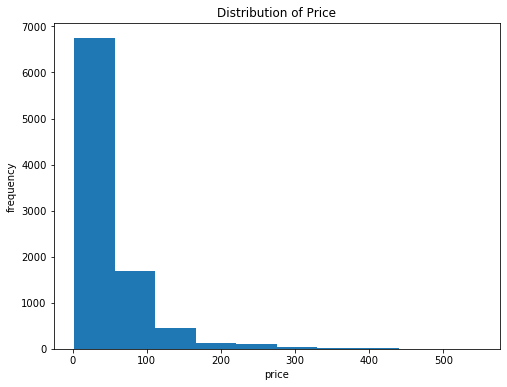

In [6]:
# distribution of price

fig = plt.figure(figsize=(8,6))
ax = plt.axes()

ax.hist(df.price)
ax.set_title('Distribution of Price')
ax.set_xlabel('price')
ax.set_ylabel('frequency')

plt.show()


# price range from 2 - 549
# most price is between 2 - 100
# price will be put into binning -> very cheap, cheap, medium, expensive, very expensive, premium

In [7]:
# # 1) create dataframe category vs price
# df_category_price = df[['category', 'price']]


# 1) binning the price into category (very cheap, cheap, medium, expensive, very expensive, premium)
# df_category_price['price_category'] = df_category_price['price'] # Alt 1 for copying column and rows
df['price_category'] = df.loc[:,'price'] # Alt 2 for copying rows and column
df['price_category'] = pd.cut(df['price_category'], [0, 100, 200, 300, 400, 500, 600], labels=['very cheap', 'cheap', 'medium', 'expensive', 'very expensive', 'premium'])

data_perfume_moist = df[['category', 'price', 'price_category']][(df.category=='Perfume') | (df.category=='Moisturizers')]
data_perfume_moist

category  price price_category
id                                         
1417567       Perfume  180.0          cheap
1417617       Perfume  120.0          cheap
1417609       Perfume  180.0          cheap
1638832       Perfume  210.0         medium
2221596       Perfume   58.0     very cheap
...               ...    ...            ...
2047744       Perfume   79.0     very cheap
2047777       Perfume   79.0     very cheap
2047769       Perfume   79.0     very cheap
2235133  Moisturizers   17.0     very cheap
1788991       Perfume   17.0     very cheap

[1116 rows x 3 columns]

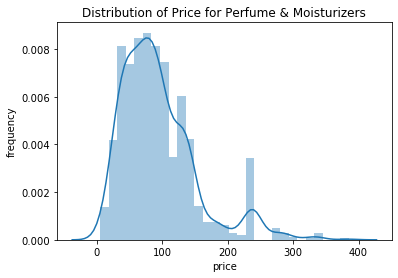

In [8]:
# 3) Check distribution of price for Perfume & Moisturizers
sns.distplot(data_perfume_moist.price)
plt.title('Distribution of Price for Perfume & Moisturizers')

plt.xlabel('price')
plt.ylabel('frequency')

plt.show()

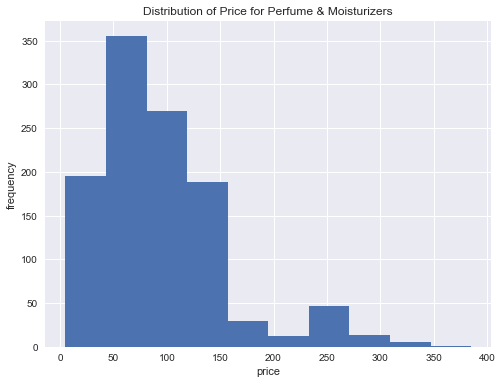

In [9]:
# 3) Check distribution of price for Perfume & Moisturizers
plt.style.use('seaborn')

fig = plt.figure(figsize=(8,6))
ax = plt.axes()

ax.hist(data_perfume_moist.price)
ax.set_title('Distribution of Price for Perfume & Moisturizers')
ax.set_xlabel('price')
ax.set_ylabel('frequency')

plt.show()

In [10]:
# 4) Price Category in Pie Chart
price_by_price_category = data_perfume_moist[['price', 'price_category']].groupby(['price_category'], as_index=False).count()
price_by_price_category

price_category  price
0      very cheap    745
1           cheap    295
2          medium     70
3       expensive      6
4  very expensive      0
5         premium      0

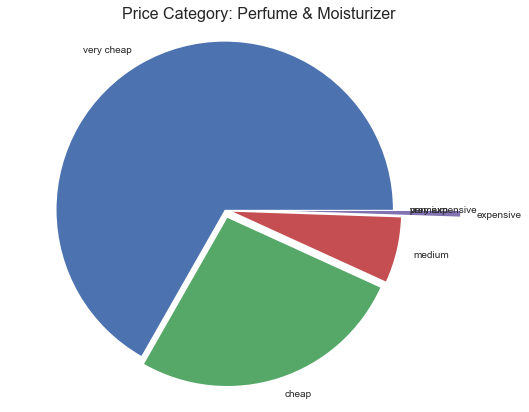

==> Price of Perfume and Moisturizer are mostly categorized as VERY CHEAP and CHEAP


In [11]:
# Pie Chart
fig = plt.figure(figsize=(9,7))
ax = plt.axes()

# data
ax.pie(price_by_price_category['price'], labels = price_by_price_category['price_category'], explode = (0, 0.05, 0.05, 0.4, 0, 0))

# data label
ax.set_title('Price Category: Perfume & Moisturizer', size=16)
ax.axis('equal')

# show
plt.show()
print('==> Price of Perfume and Moisturizer are mostly categorized as VERY CHEAP and CHEAP')

#### 2) Untuk brand "SEPHORA COLLECTION" apakah banyak yang suka dengan produknya ? (jangan gunakan review 0)

In [12]:
# alt 1
df[df['brand'] == 'SEPHORA COLLECTION'].pivot_table(index='rating', values=['brand'], aggfunc='count', margins=True)

# alt 2
# df.brand.value_counts()

brand
rating       
0.0        31
1.5         1
2.0         5
2.5        11
3.0        26
3.5        67
4.0       125
4.5       182
5.0        48
All       496

In [13]:
# Create dataframe brand & rating
# df_sephora_rating = df[['brand', 'rating']][df['brand'] == 'SEPHORA COLLECTION']

# 1) binning the category into very bad, bad, so-so, good, very good
df['rating_category'] = df['rating']
df['rating_category'] = pd.cut(df['rating_category'], [0, 1, 2, 3, 4, 5], labels=["very bad", "bad", "so-so", "good", "very good"])
df.head()

brand   category                            name  \
id                                                                   
2218774  Acqua Di Parma  Fragrance  Blu Mediterraneo MINIATURE Set   
2044816  Acqua Di Parma    Cologne                         Colonia   
1417567  Acqua Di Parma    Perfume                Arancia di Capri   
1417617  Acqua Di Parma    Perfume                Mirto di Panarea   
2218766  Acqua Di Parma  Fragrance           Colonia Miniature Set   

                   size  rating  number_of_reviews  love  price  value_price  \
id                                                                             
2218774  5 x 0.16oz/5mL     4.0                  4  3002   66.0         75.0   
2044816   0.7 oz/ 20 mL     4.5                 76  2700   66.0         66.0   
1417567    5 oz/ 148 mL     4.5                 26  2600  180.0        180.0   
1417617   2.5 oz/ 74 mL     4.5                 23  2900  120.0        120.0   
2218766  5 x 0.16oz/5mL     3.5                  2   943   72.0         80.0   

                                                       URL  ...  \
id                                                          ...   
2218774  https://www.sephora.com/product/blu-mediterran...  ...   
2044816  https://www.sephora.com/product/colonia-P16360...  ...   
1417567  https://www.sephora.com/product/blu-mediterran...  ...   
1417617  https://www.sephora.com/product/blu-mediterran...  ...   
2218766  https://www.sephora.com/product/colonia-miniat...  ...   

                                                   options  \
id                                                           
2218774                                         no options   
2044816   - 0.7 oz/ 20 mL  Spray  - 1.7 oz/ 50 mL Eau d...   
1417567   - 1oz/30mL Eau de Toilette  - 2.5 oz/ 74 mL E...   
1417617   - 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...   
2218766                                         no options   

                                                   details  \
id                                                           
2218774  This enchanting set comes in a specially handc...   
2044816  An elegant timeless scent filled with a fresh-...   
1417567  Fragrance Family: Fresh Scent Type: Fresh Citr...   
1417617  Panarea near Sicily is an an island suspended ...   
2218766  The Colonia Miniature Set comes in an iconic A...   

                                                how_to_use  \
id                                                           
2218774  Suggested Usage:-Fragrance is intensified by t...   
2044816                                    no instructions   
1417567                                    no instructions   
1417617                                    no instructions   
2218766  Suggested Usage:-Fragrance is intensified by t...   

                                               ingredients online_only  \
id                                                                       
2218774  Arancia di Capri Eau de Toilette: Alcohol Dena...           1   
2044816                                            unknown           1   
1417567  Alcohol Denat.- Water- Fragrance- Limonene- Li...           1   
1417617                                            unknown           1   
2218766  Colonia: Alcohol Denat.- Water- Fragrance- Lim...           1   

        exclusive  limited_edition  limited_time_offer  price_category  \
id                                                                       
2218774         0                0                   0      very cheap   
2044816         0                0                   0      very cheap   
1417567         0                0                   0           cheap   
1417617         0                0                   0           cheap   
2218766         0                0                   0      very cheap   

         rating_category  
id                        
2218774             good  
2044816        very good  
1417567        very good  
1417617        ver

In [14]:
# df_sephora_rating.rating.value_counts(), df_sephora_rating.rating_category.value_counts()

In [15]:
# 2) Group "Sephora" by rating
sephora_rating = df[['rating_category', 'brand', 'rating']].groupby(['rating_category'], as_index=False).count()
sephora_rating

rating_category  brand  rating
0        very bad     23      23
1             bad     48      48
2           so-so    396     396
3            good   3904    3904
4       very good   4399    4399

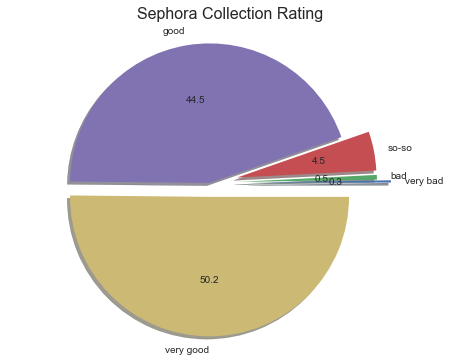

Based on its rating, it can be concluded that most people LIKE Sephora Collection


In [16]:
# 3) Pie Chart

# figure & axis
fig = plt.figure(figsize=(8,6))
ax = plt.axes()

# data
ax.pie(sephora_rating.rating, labels=sephora_rating.rating_category, autopct='%.1f', labeldistance=1.1,shadow=True, explode=(0.3, 0.2, 0.2, 0, 0.1))

# data label
ax.set_title("Sephora Collection Rating", size=16)
ax.axis('equal')

# show
plt.show()
print('Based on its rating, it can be concluded that most people LIKE Sephora Collection')

#### 3) Bandingkan harga antara brand "Dior" dengan "SEPHORA COLLECTION" ?

In [32]:
data_dior_sephora = df[(df["brand"]=='Dior') | (df['brand']=='SEPHORA COLLECTION')][['brand', 'price', 'price_category']]
data_dior_sephora.sample(10)

brand  price price_category
id                                               
2185817                Dior   29.5     very cheap
2265528                Dior   38.0     very cheap
1897271  SEPHORA COLLECTION   52.0     very cheap
2145498  SEPHORA COLLECTION   60.0     very cheap
1877414  SEPHORA COLLECTION   25.0     very cheap
2052892  SEPHORA COLLECTION    9.0     very cheap
2080265  SEPHORA COLLECTION    7.0     very cheap
2149813  SEPHORA COLLECTION   10.0     very cheap
1985845  SEPHORA COLLECTION   16.0     very cheap
2275808  SEPHORA COLLECTION    5.0     very cheap

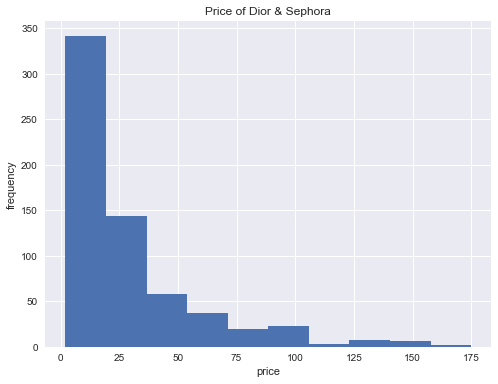

In [37]:
# Histogram
plt.style.use('seaborn')
fig = plt.figure(figsize=(8,6))
ax = plt.axes()

ax.hist(data_dior_sephora.price)
ax.set_title('Price of Dior & Sephora')
ax.set_xlabel('price')
ax.set_ylabel('frequency')

plt.show()

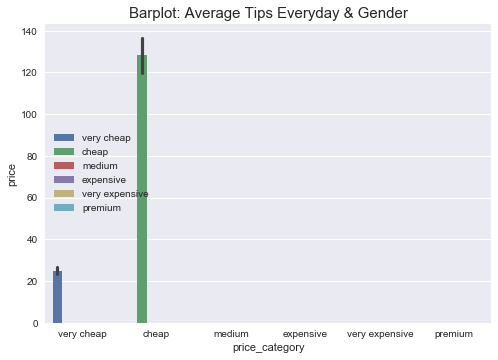

In [40]:
# # Scatter Plot
# # figure & axis
# fig = plt.figure(figsize=(8,6))
# ax = plt.axes()

# # data
# brand = data_dior_sephora['brand']
# price = data_dior_sephora['price']

# ax.scatter(brand, price)

# # data label
# plt.title('Price of Dior & Sephora')
# plt.xlabel('brand')
# plt.ylabel('price')

# # show
# plt.show()






# sns.barplot(data=data_dior_sephora, x='price_category', y='price', hue='price_category')

# plt.title('Barplot: Average Tips Everyday & Gender', size=15)

# plt.legend(loc=0)

# plt.show()

 #### 4) Siapa brand yang paling banyak memiliki jumlah barang ? urutkan top 5 ?

In [100]:
# top5_quantity = pd.DataFrame(df['brand'].value_counts().head(5), columns=['brand'])
# top5_quantity

top5_quantity = df[['brand', 'price']].groupby(['brand'], as_index=True).count()
top5_quantity['price'].sort_values(ascending=False).head(5)

brand
SEPHORA COLLECTION    496
CLINIQUE              234
tarte                 170
TOM FORD              161
Dior                  145
Name: price, dtype: int64

 #### 5) Siapa brand yang paling banyak disukai ? urutkan top 5 ?

In [101]:
top5_rating = df[['brand', 'rating']].groupby(['brand'], as_index=True).count()
top5_rating

rating
brand                   
8Greens                3
AERIN                 22
ALTERNA Haircare      42
AMOREPACIFIC          33
Acqua Di Parma        35
...                  ...
shu uemura            45
stila                  7
surratt beauty        25
tarte                170
trèStiQue              4

[324 rows x 1 columns]

#### 6) Kategori apa yang paling banyak menyumbang penjualan dari brand "tarte" ?

#### 7) Apakah ada hubungan antara harga dengan banyaknya produk yang terjual, dan banyaknya produk yang disukai ?

# TASK:  DASHBOARD - SEPHORA
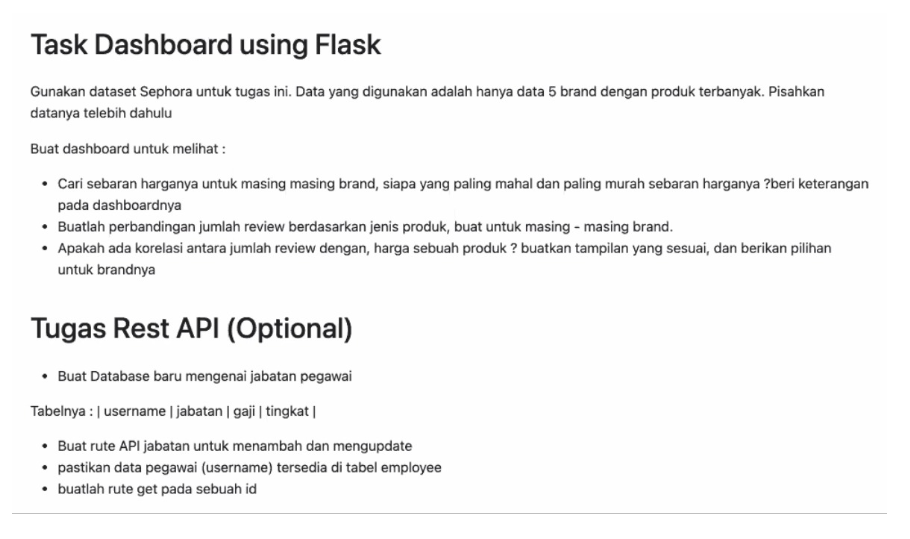

In [3]:
df = pd.read_csv('data/sephora_website_dataset.csv', index_col=0) # index_col='id' or index_col=0
df.head()

brand   category                            name  \
id                                                                   
2218774  Acqua Di Parma  Fragrance  Blu Mediterraneo MINIATURE Set   
2044816  Acqua Di Parma    Cologne                         Colonia   
1417567  Acqua Di Parma    Perfume                Arancia di Capri   
1417617  Acqua Di Parma    Perfume                Mirto di Panarea   
2218766  Acqua Di Parma  Fragrance           Colonia Miniature Set   

                   size  rating  number_of_reviews  love  price  value_price  \
id                                                                             
2218774  5 x 0.16oz/5mL     4.0                  4  3002   66.0         75.0   
2044816   0.7 oz/ 20 mL     4.5                 76  2700   66.0         66.0   
1417567    5 oz/ 148 mL     4.5                 26  2600  180.0        180.0   
1417617   2.5 oz/ 74 mL     4.5                 23  2900  120.0        120.0   
2218766  5 x 0.16oz/5mL     3.5                  2   943   72.0         80.0   

                                                       URL  MarketingFlags  \
id                                                                           
2218774  https://www.sephora.com/product/blu-mediterran...            True   
2044816  https://www.sephora.com/product/colonia-P16360...            True   
1417567  https://www.sephora.com/product/blu-mediterran...            True   
1417617  https://www.sephora.com/product/blu-mediterran...            True   
2218766  https://www.sephora.com/product/colonia-miniat...            True   

        MarketingFlags_content  \
id                               
2218774            online only   
2044816            online only   
1417567            online only   
1417617            online only   
2218766            online only   

                                                   options  \
id                                                           
2218774                                         no options   
2044816   - 0.7 oz/ 20 mL  Spray  - 1.7 oz/ 50 mL Eau d...   
1417567   - 1oz/30mL Eau de Toilette  - 2.5 oz/ 74 mL E...   
1417617   - 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...   
2218766                                         no options   

                                                   details  \
id                                                           
2218774  This enchanting set comes in a specially handc...   
2044816  An elegant timeless scent filled with a fresh-...   
1417567  Fragrance Family: Fresh Scent Type: Fresh Citr...   
1417617  Panarea near Sicily is an an island suspended ...   
2218766  The Colonia Miniature Set comes in an iconic A...   

                                                how_to_use  \
id                                                           
2218774  Suggested Usage:-Fragrance is intensified by t...   
2044816                                    no instructions   
1417567                                    no instructions   
1417617                                    no instructions   
2218766  Suggested Usage:-Fragrance is intensified by t...   

                                               ingredients  online_only  \
id                                                                        
2218774  Arancia di Capri Eau de Toilette: Alcohol Dena...            1   
2044816                                            unknown            1   
1417567  Alcohol Denat.- Water- Fragrance- Limonene- Li...            1   
1417617                                            unknown            1   
2218766  Colonia: Alcohol Denat.- Water- Fragrance- Lim...            1   

         exclusive  limited_edition  limited_time_offer  
id                                                       
2218774          0                0                   0  
2044816          0                0                   0  
1417567          0                0                   0  
1417617          0                0                   0  
2

In [3]:
# Alt 1

# df.brand.value_counts().head(5)
top5_brands = df.brand.value_counts()[:5].index
top5_brands

df_top_5 = df[df['brand'].isin(top5_brands)].reset_index(drop=True)
df_top_5.head()

brand               category  \
0  CLINIQUE           Moisturizers   
1  CLINIQUE           Moisturizers   
2  CLINIQUE           Moisturizers   
3  CLINIQUE  Face Wash & Cleansers   
4  CLINIQUE             Foundation   

                                                name     size  rating  \
0  Moisture Surge 72-Hour Auto-Replenishing Hydrator  no size     4.5   
1        Dramatically Different Moisturizing Lotion+  no size     4.0   
2            Dramatically Different Moisturizing Gel  no size     4.5   
3                                 Liquid Facial Soap  no size     4.5   
4  Even Better Foundation Makeup Broad Spectrum S...  no size     4.0   

   number_of_reviews   love  price  value_price  \
0               1000  71100   39.5         39.5   
1               1000  72900   28.0         28.0   
2               3000  83000   28.0         28.0   
3               2000  46500   18.5         18.5   
4               2000  67300   29.5         29.5   

                                                 URL  MarketingFlags  \
0  https://www.sephora.com/product/moisture-surge...           False   
1  https://www.sephora.com/product/dramatically-d...           False   
2  https://www.sephora.com/product/dramatically-d...           False   
3  https://www.sephora.com/product/liquid-facial-...           False   
4  https://www.sephora.com/product/even-better-ma...           False   

  MarketingFlags_content     options  \
0                      0  no options   
1                      0  no options   
2                      0  no options   
3                      0  no options   
4                      0  no options   

                                             details  \
0  What it is:  A refreshing- oil-free gel cream ...   
1  What it is:  A dermatologist-developed face mo...   
2  What it is:  A dermatologist-developed- oil-fr...   
3  Which skin type is it good for?✔ Normal✔ Oily✔...   
4  What it is: A dermatologist-developed foundati...   

                                          how_to_use  \
0  Suggested Usage:-This multitasking formula can...   
1  Suggested Usage:-Spread all over face and thro...   
2  Suggested Usage:-Spread all over face and thro...   
3  Suggested Usage:-With tepid water- lather Liqu...   
4  Suggested Usage:-Start in center of your face-...   

                                         ingredients  online_only  exclusive  \
0   -Auto-Replenishing Technology with Caffeine: ...            0          0   
1  -Sunflower Seed Cake- Barley Extract- and Cucu...            0          0   
2   -Sunflower Seed Cake- Barley Extract- and Cuc...            0          0   
3  Water- Sodium Laureth Sulfate- Sodium Chloride...            0          0   
4  -Octinoxate 5.9%- Titanium Dioxide 3.5%- Zinc ...            0          0   

   limited_edition  limited_time_offer  
0                0                   0  
1                0                   0  
2                0                   0  
3                0                   0  
4                0                   0

In [24]:
# Alt 2
# df_top_5 = df[(df.brand=='SEPHORA COLLECTION') | (df.brand=='CLINIQUE') | (df.brand=='tarte') | (df.brand=='TOM FORD') | (df.brand=='Dior')]
# df_top_5.head()

In [5]:
df['price']

id
2218774     66.0
2044816     66.0
1417567    180.0
1417617    120.0
2218766     72.0
           ...  
2208502      6.0
2298909     15.0
2236750     16.0
50          50.0
304         50.0
Name: price, Length: 9168, dtype: float64

In [5]:
# df_top_5.to_csv('data/sephora_website_dataset_top_5.csv')              

### Task 1
- visualize the price distribution
- what is most expensive and the cheapest
- provide the description
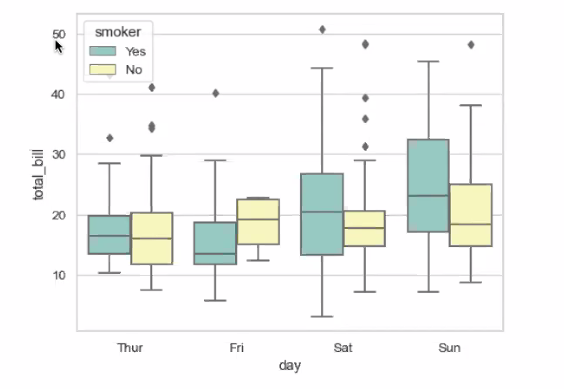

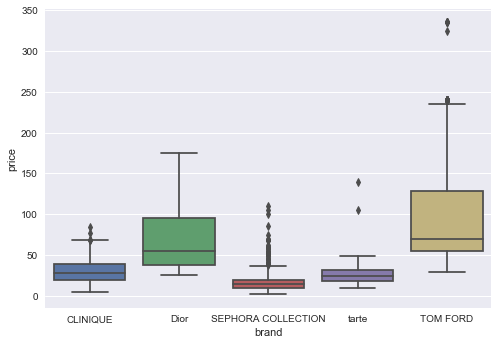

In [5]:
# Boxplot with seaborn
plt.style.use('seaborn')
sns.boxplot(data=df_top_5, x='brand', y='price')

plt.show()

In [14]:
# code in VS for function category_plot
df['brand'].unique()[:10]
x = df[df['brand'] == 'Acqua Di Parma']['brand']
y = df[df['brand'] == 'Acqua Di Parma']['price']
x, y

(id
 2218774    Acqua Di Parma
 2044816    Acqua Di Parma
 1417567    Acqua Di Parma
 1417617    Acqua Di Parma
 2218766    Acqua Di Parma
 1417609    Acqua Di Parma
 1638832    Acqua Di Parma
 1284462    Acqua Di Parma
 2221588    Acqua Di Parma
 2221596    Acqua Di Parma
 2243699    Acqua Di Parma
 1417633    Acqua Di Parma
 1886621    Acqua Di Parma
 1417575    Acqua Di Parma
 2339661    Acqua Di Parma
 2295228    Acqua Di Parma
 2044725    Acqua Di Parma
 2222917    Acqua Di Parma
 967224     Acqua Di Parma
 1059500    Acqua Di Parma
 2295210    Acqua Di Parma
 2243715    Acqua Di Parma
 1979608    Acqua Di Parma
 2222909    Acqua Di Parma
 1226885    Acqua Di Parma
 1915396    Acqua Di Parma
 1775055    Acqua Di Parma
 2295236    Acqua Di Parma
 2295194    Acqua Di Parma
 1629369    Acqua Di Parma
 1915412    Acqua Di Parma
 2295202    Acqua Di Parma
 2295186    Acqua Di Parma
 2339703    Acqua Di Parma
 2339687    Acqua Di Parma
 Name: brand, dtype: object, id
 2218774     66.0
 

In [6]:
# Boxplot with plotly
fig = px.box(df_top_5, x='brand', y='price', color="brand")
fig.show()

#### Analysis
- dari grafik di atas tom ford adalah brand dengan sebaran harga yang mahal dibandingkan dengan 5 brand lainnya.
- brand yang murah adalah sephora karena sebaran harganya berada di bawah 4 brand lainnya.

In [36]:
# Subplot
# plt.style.use('seaborn')
# fig, axes = plt.subplots(3, 2, figsize=(15, 10))


# axes[0, 0].hist(df_top_5['price'])
# axes[0, 0].set_title('Top-5 Brands')


# axes[0, 1].hist(df_top_5[df_top_5.brand=='SEPHORA COLLECTION']['price'])
# axes[0, 1].set_title('SEPHORA COLLECTION')


# axes[1, 0].hist(df_top_5[df_top_5.brand=='CLINIQUE']['price'])
# axes[1, 0].set_title('CLINIQUE')


# axes[1, 1].hist(df_top_5[df_top_5.brand=='tarte']['price'])
# axes[1, 1].set_title('tarte')


# axes[2, 0].hist(df_top_5[df_top_5.brand=='TOM FORD']['price'])
# axes[2, 0].set_title('TOM FORD')


# axes[2, 1].hist(df_top_5[df_top_5.brand=='Dior']['price'])
# axes[2, 1].set_title('Dior')


# plt.show()

In [37]:
# x = np.linspace(0, 2 * np.pi, 400)
# y = np.sin(x ** 2)

# fig, axs = plt.subplots(2, 2)
# axs[0, 0].hist(df_top_5[df_top_5.brand=='SEPHORA COLLECTION']['price'])
# axs[0, 0].set_title('Axis [0,0]')
# axs[0, 1].plot(x, y, 'tab:orange')
# axs[0, 1].set_title('Axis [0,1]')
# axs[1, 0].plot(x, -y, 'tab:green')
# axs[1, 0].set_title('Axis [1,0]')
# axs[1, 1].plot(x, -y, 'tab:red')
# axs[1, 1].set_title('Axis [1,1]')

### Task 2
- Create comparison of review based on product types
- Create for each brand

In [35]:
top5_brands

Index(['SEPHORA COLLECTION', 'CLINIQUE', 'tarte', 'TOM FORD', 'Dior'], dtype='object')

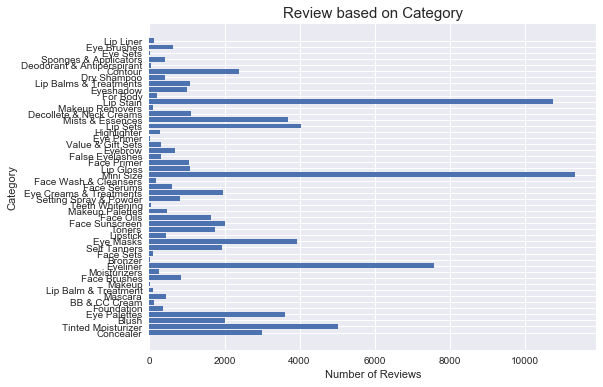

In [36]:
# Barplot with matplotlib, df should be first filtered or not

review_by_category = df_top_5[df_top_5.brand=='tarte'][['number_of_reviews', 'category']].groupby(['category'], as_index=True).sum()
# review_by_category

# figure & axis
fig = plt.figure(figsize=(8,6))
ax = plt.axes()

# data
brand = top5_brands[2]
category = df_top_5[df_top_5.brand=='tarte']['category'].unique().tolist()
number_of_reviews = review_by_category['number_of_reviews']

ax.barh(category, number_of_reviews)

# data label
plt.title('Review based on Category', size=15)
plt.xlabel('Number of Reviews')
plt.ylabel('Category')

# show
plt.show()

In [32]:
top5_brands

Index(['SEPHORA COLLECTION', 'CLINIQUE', 'tarte', 'TOM FORD', 'Dior'], dtype='object')

In [16]:
# Barplot with plotly
brand = top5_brands[1]
data = df_top_5[df_top_5.brand==brand]
fig = px.bar(data, x='category', y='number_of_reviews', color='category')
fig.show()

### Task 3
- Is there any correlation between review and price?
- Create the visualization with selection button of brand

In [39]:
df_top_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 20 columns):
brand                     1206 non-null object
category                  1206 non-null object
name                      1206 non-null object
size                      1206 non-null object
rating                    1206 non-null float64
number_of_reviews         1206 non-null int64
love                      1206 non-null int64
price                     1206 non-null float64
value_price               1206 non-null float64
URL                       1206 non-null object
MarketingFlags            1206 non-null bool
MarketingFlags_content    1206 non-null object
options                   1206 non-null object
details                   1206 non-null object
how_to_use                1206 non-null object
ingredients               1206 non-null object
online_only               1206 non-null int64
exclusive                 1206 non-null int64
limited_edition           1206 non-null int64
limi

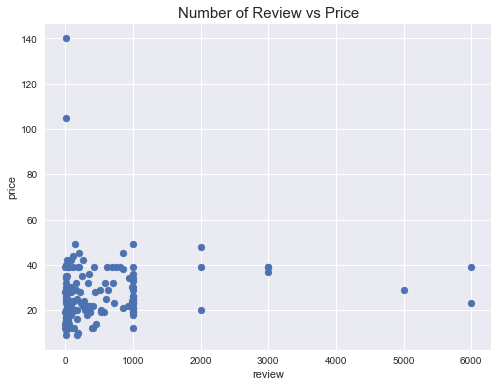

In [88]:
# Scatterplot with matplotlib
# figure & axis
fig = plt.figure(figsize=(8,6))
ax = plt.axes()

# data
review = df_top_5[df_top_5.brand == 'tarte']['number_of_reviews']
price = df_top_5[df_top_5.brand == 'tarte']['price']

ax.scatter(review, price)

# data label
plt.title('Number of Review vs Price', size=15)
plt.xlabel('review')
plt.ylabel('price')

# show
plt.show()

In [43]:
top5_brands

Index(['SEPHORA COLLECTION', 'CLINIQUE', 'tarte', 'TOM FORD', 'Dior'], dtype='object')

In [48]:
# Scatterplot with plotly - SEPHORA
brand = top5_brands[0]
data = df_top_5[df_top_5.brand==brand]
fig = px.scatter(data, x='price', y='number_of_reviews')
fig.show()

In [47]:
# Scatterplot with plotly - SEPHORA
brand = top5_brands[1]
data = df_top_5[df_top_5.brand==brand]
fig = px.scatter(data, y='price', x='number_of_reviews')
fig.show()

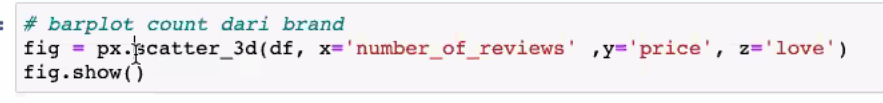

In [49]:
# 3D with plotly
fig = px.scatter_3d(df, x= 'number_of_reviews', y='price', z='love')
fig.show()

In [15]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.show()